
# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [34]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [35]:
df.shape

(110527, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning

In [37]:
#correcttion of spelling of column name  
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'Doctor_visit'}, inplace= True)

In [38]:
# organiging column name  
df.rename(columns=(lambda x: x.strip().lower().replace("-","_")), inplace=True)

In [39]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,doctor_visit
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# correction of datatype 

In [41]:
df['patientid']=df['patientid'].astype('int')

In [42]:
df['scheduledday']=pd.to_datetime(df['scheduledday']).dt.date.astype('datetime64[ns]')
df['appointmentday']=pd.to_datetime(df['appointmentday']).dt.date.astype('datetime64[ns]')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  int32         
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hypertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handicap        110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  doctor_visit    110527 non-null  object        
dtypes: datetime64[ns](2), int32(1), int6

In [44]:
df.shape

(110527, 14)

In [45]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'doctor_visit'],
      dtype='object')

#### From the above Info of the DataFrame and the sample data we can see that there are 14 columns in total.

#### There are 13 Independent Variables  ->
'patientid', 'appointmentid', 'gender', 
'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship',
'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 

#### The Dependent Variable is ->
'doctor_visit'


In [46]:
# no_show no is present and yes is absent  so rename the value 
df['doctor_visit'].replace({'No':'present','Yes':'absent'}, inplace=True)

In [47]:
#now check the range of age
print('minimum age is {}'.format(df['age'].min()))

print('maximum age is {}'.format(df['age'].max()))

minimum age is -1
maximum age is 115


In [48]:
# age should not be negative so i kept the age between 1 to 100

In [49]:
df.drop(df[(df['age']<0) | (df['age']>100)].index, inplace=True)

In [50]:
#now check the range of age
print('minimum age is {}'.format(df['age'].min()))

print('maximum age is {}'.format(df['age'].max()))

minimum age is 0
maximum age is 100


In [51]:
print('The  Schedule date starte from  {} '.format(df['scheduledday'].dt.strftime('%Y-%m-%d').min()))
print('The  Schedule date Ended at  {} '.format(df['scheduledday'].dt.strftime('%Y-%m-%d').max()))

The  Schedule date starte from  2015-11-10 
The  Schedule date Ended at  2016-06-08 


In [52]:
print('The  Apointment date starte from  {} '.format(df['appointmentday'].dt.strftime('%Y-%m-%d').min()))
print('The  Apointment date Ended at  {} '.format(df['appointmentday'].dt.strftime('%Y-%m-%d').max()))

The  Apointment date starte from  2016-04-29 
The  Apointment date Ended at  2016-06-08 


In [53]:
df['scheduledday_of_week']=df['scheduledday'].dt.day_name()

In [54]:
df['appointmentday_of_week']=df['appointmentday'].dt.day_name()

In [55]:
df['waiting_Time']= df['appointmentday']-df['scheduledday']

In [56]:
# Now i want to get the number and % of doctor_visit 

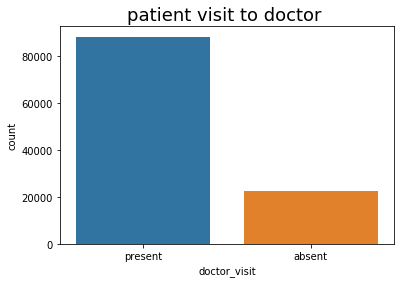

In [57]:
sns.countplot(x='doctor_visit', data=df)
plt.title('patient visit to doctor ', fontsize=18)
plt.show()

### Patient visit to doctor
* absent     22316
* present    88203

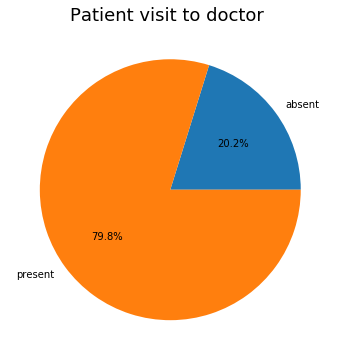

In [58]:
df.groupby('doctor_visit').count()['patientid'].plot(kind='pie',autopct='%1.1f%%',figsize=(8,6))
plt.title('Patient visit to doctor ', fontsize=18)
plt.ylabel('')
plt.show()

In [59]:
df.groupby('doctor_visit').count()['patientid']

doctor_visit
absent     22316
present    88203
Name: patientid, dtype: int64

From the above observation we found that
1. 79.8% schadule patient visit to doctor 
2. 20.2% schadule patient do not visit to doctor

In [60]:
# now we want to know what is the percet of doctor vist  as per gender

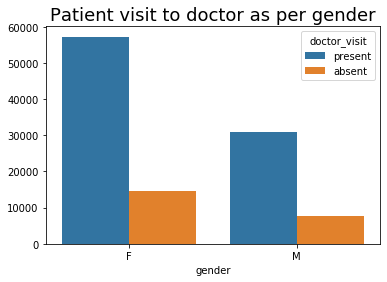

In [61]:
sns.countplot(x='gender', hue='doctor_visit', data=df)
plt.title('Patient visit to doctor as per gender', fontsize=18)
plt.ylabel('')
plt.show()


In [62]:
df.groupby(['doctor_visit','gender']).count()['patientid']

doctor_visit  gender
absent        F         14591
              M          7725
present       F         57241
              M         30962
Name: patientid, dtype: int64

Patient visit to doctor 
* Femail: Present # 57241, absent# 14591
* Mail: Present # 30962, absent# 7725

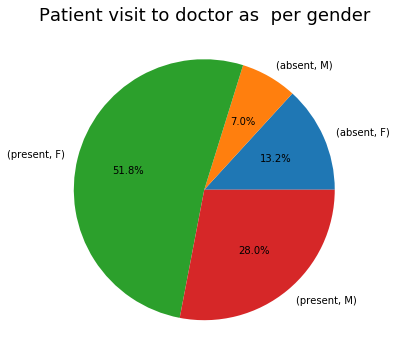

In [63]:
df.groupby(['doctor_visit','gender']).count()['patientid'].plot(kind='pie',autopct='%1.1f%%',figsize=(8,6))
plt.title('Patient visit to doctor as  per gender', fontsize=18)
plt.ylabel('')
plt.show()

From the above observation we found that
1. 79.8% schadule patient visit to doctor where 51.8% is Female and 28% male
2. 20.2% schadule patient do not visit to doctor where 13.2% is Female and 7% male

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CC2D53648>,
      dtype=object)

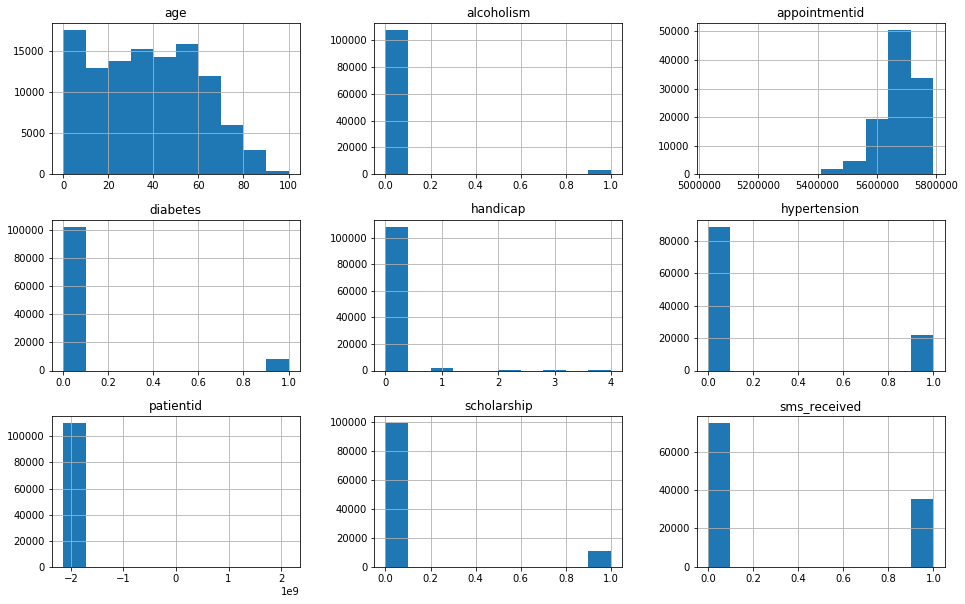

In [64]:
# NOW WANT TO SEE HOW VARIABLE IS DISTRIBUTED
df.hist(figsize=(16,10))

#### From the histrogram we have a rough overview about the values of different variables

<a id='eda'></a>
## Exploratory Data Analysis



### Is there any effect of patient age on Doctor Visit Appointment Show Up or No Show Up

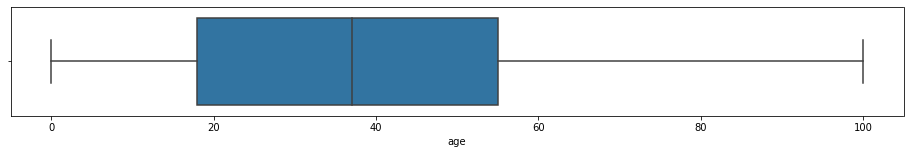

In [65]:
# now we want to see the age distributions of patients

plt.figure(figsize=(16,2))
sns.boxplot(df['age'])
plt.show()



In [66]:
print('The mean age of the patients is {:.2f}'.format(df['age'].mean()))
print('The 25% age of the patients is {}'.format(df['age'].quantile(.25)))
print('The 75% age of the patients is {}'.format(df['age'].quantile(.75)))

The mean age of the patients is 37.08
The 25% age of the patients is 18.0
The 75% age of the patients is 55.0


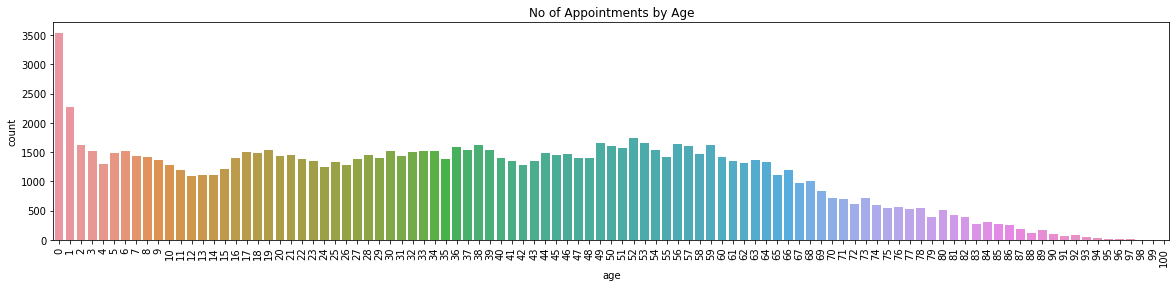

In [67]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.countplot(x=df['age'])
plt.title('No of Appointments by Age')
plt.show()

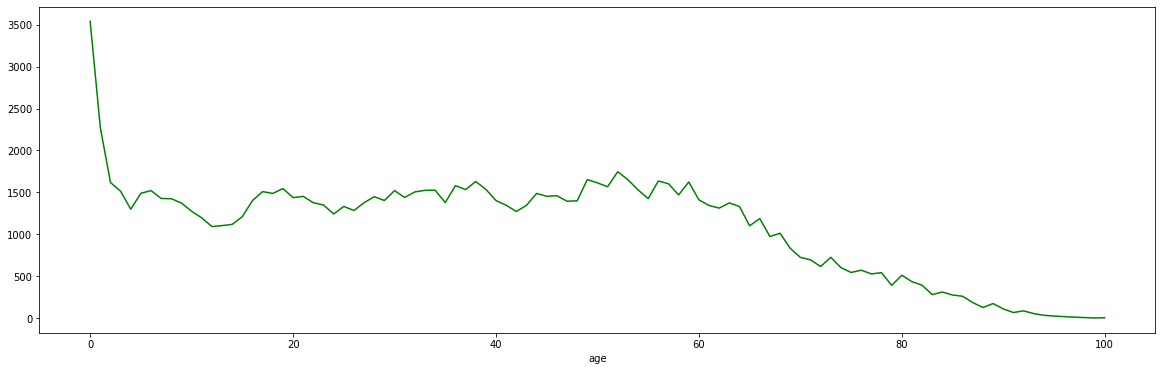

In [68]:
df.groupby('age').count()['doctor_visit'].plot(figsize=(20,6), color='g')
plt.show()

From the figure we can see that at age 0 and 1 infent number of appointment is high then age 2 to 60  patient have almost same number of appointment and age above 60 year have right-skewed distribution of Number of Appointments 

In [69]:
absent=df[df['doctor_visit']=='absent']

In [70]:
absent_ratio= absent.groupby('age').size()/df.groupby('age').size()

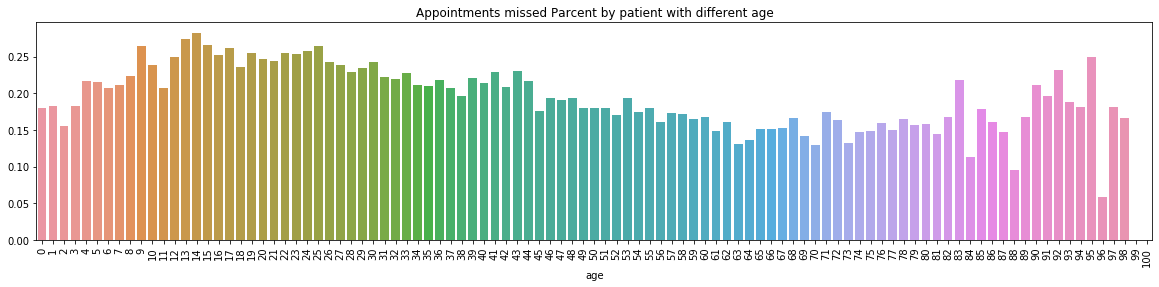

In [71]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=absent_ratio.index, y=absent_ratio)
plt.title('Appointments missed Parcent by patient with different age')
plt.show()

#### From the above plot we have the idea about Appointment missed rate per age patients

In [72]:
absent_ratio_grater_then_mean=absent_ratio[absent_ratio>absent_ratio.mean()]

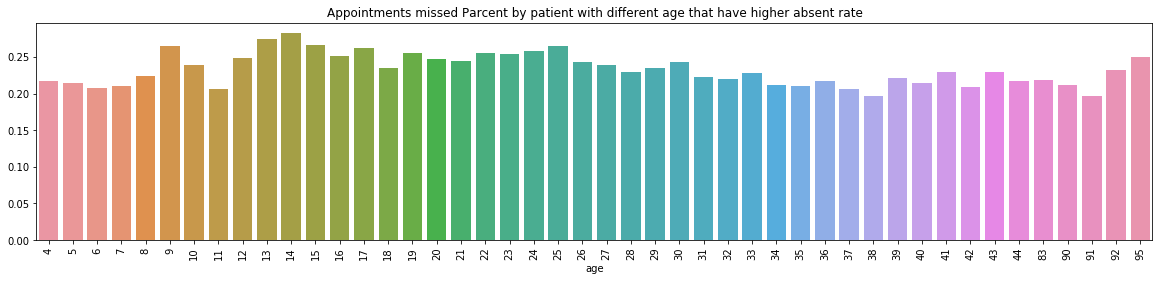

In [73]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=absent_ratio_grater_then_mean.index,y=absent_ratio_grater_then_mean)
plt.title('Appointments missed Parcent by patient with different age that have higher absent rate')
plt.show()

#### From the above plot we have the idea about Appointment missed rate per age patients those have higher parcent then mean

In [74]:
bin_ranges = [-1, 2, 8, 16, 18, 25, 40, 50, 60, 75]
bin_names = ["Baby", "Children", "Teenager", 'Young', 'Young-Adult', 'Adult', 'Adult-II', 'Senior', 'Old']

df['age_bin'] = pd.cut((df['age']),bins = bin_ranges, labels= bin_names)

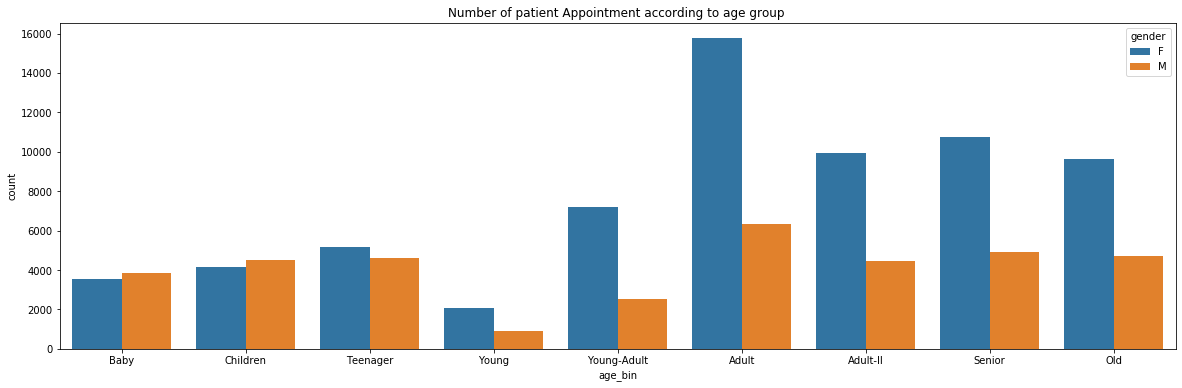

In [75]:
plt.figure(figsize=(20,6))
sns.countplot(x='age_bin', hue='gender', data=df)
plt.title('Number of patient Appointment according to age group ')
plt.show()

#### From the plot we have idea about Number of patient Appointment  and gender according to age group 

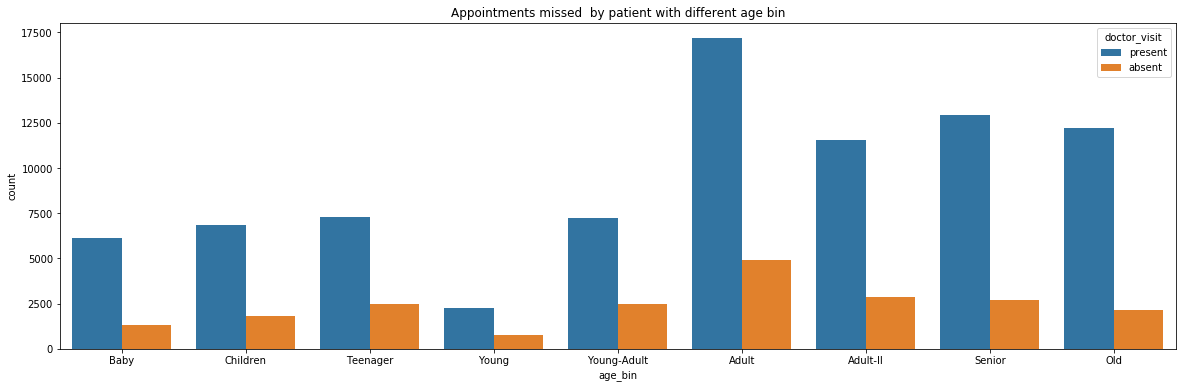

In [76]:
plt.figure(figsize=(20,6))

sns.countplot(x='age_bin', hue='doctor_visit', data=df)
plt.title('Number of patient Appointment show up and not show up')
plt.title('Appointments missed  by patient with different age bin')
plt.show()

#### From the plot we have idea about Number of patient Appointment visited or absent  according to age group 

In [77]:
absent=df[df['doctor_visit']=='absent']

In [78]:
absent_ratio_per_age_geoup= absent.groupby('age_bin').size()/df.groupby('age_bin').size()

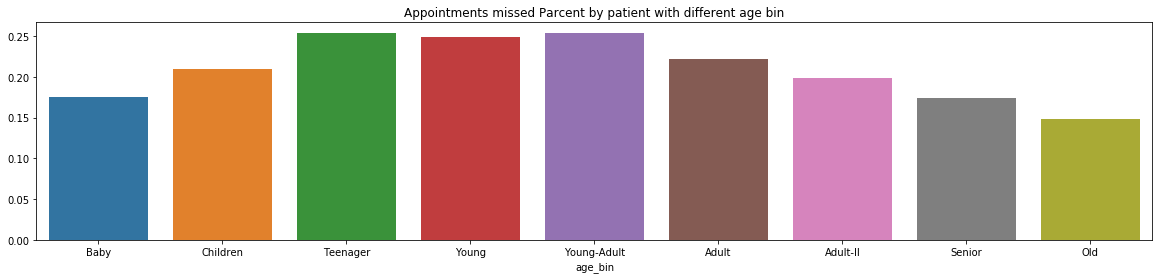

In [79]:
plt.figure(figsize=(20,4))
sns.barplot(x=absent_ratio_per_age_geoup.index,y=absent_ratio_per_age_geoup)
plt.title('Appointments missed Parcent by patient with different age bin')
plt.show()

#### From the plot we have idea about Appointments missed Parcent by patient with different age  group

### Findings
Doctor visit is high for age group 40 and up and  age with 4-44 and age above 90 have higher appoinment absent rate, as well as Teenage, young, young_Adult have high absent rate

In [80]:
## Now we want to see the correlation among data

In [81]:
df.corr()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
patientid,1.000000,-0.000579,0.005501,-0.000754,0.003212,0.004952,0.001140,-0.004324,-0.000771
appointmentid,-0.000579,1.000000,-0.019152,0.022624,0.012752,0.022636,0.032950,0.014114,-0.256627
age,0.005501,-0.019152,1.000000,-0.092427,0.504788,0.292544,0.095877,0.077382,0.012712
scholarship,-0.000754,0.022624,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.008521,0.001184
hypertension,0.003212,0.012752,0.504788,-0.019734,1.000000,0.433095,0.087971,0.080248,-0.006315
diabetes,0.004952,0.022636,0.292544,-0.024900,0.433095,1.000000,0.018470,0.057628,-0.014559
alcoholism,0.001140,0.032950,0.095877,0.035018,0.087971,0.018470,1.000000,0.004689,-0.026153
handicap,-0.004324,0.014114,0.077382,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024028
sms_received,-0.000771,-0.256627,0.012712,0.001184,-0.006315,-0.014559,-0.026153,-0.024028,1.000000


From the correlation we can see that there is moderate positive coorealtion between age and hypertension , hypertension and diabetics 

(0, 1.0723102202272001)

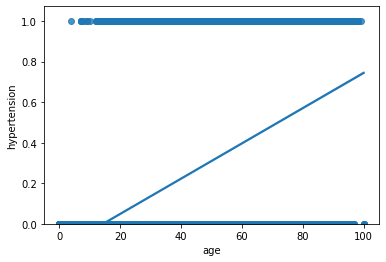

In [82]:
sns.regplot(df['age'], df['hypertension'])
plt.ylim(0)

#### age and hypertension shows moderate positive correlation 

(0, 1.066694260485651)

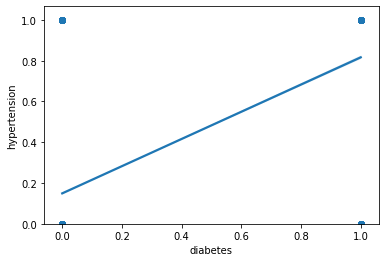

In [83]:
sns.regplot(df['diabetes'], df['hypertension'])
plt.ylim(0)

#### diabetes and hypertension shows moderate positive correlation 

(0, 1.0684962058218173)

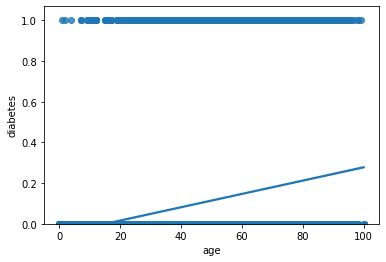

In [87]:
sns.regplot(df['age'], df['diabetes'])
plt.ylim(0)

#### age and dibates shows moderate positive correlation 


### Is there any effect of patient neighbourhood on Doctor Visit Appointment Show Up or No Show Up

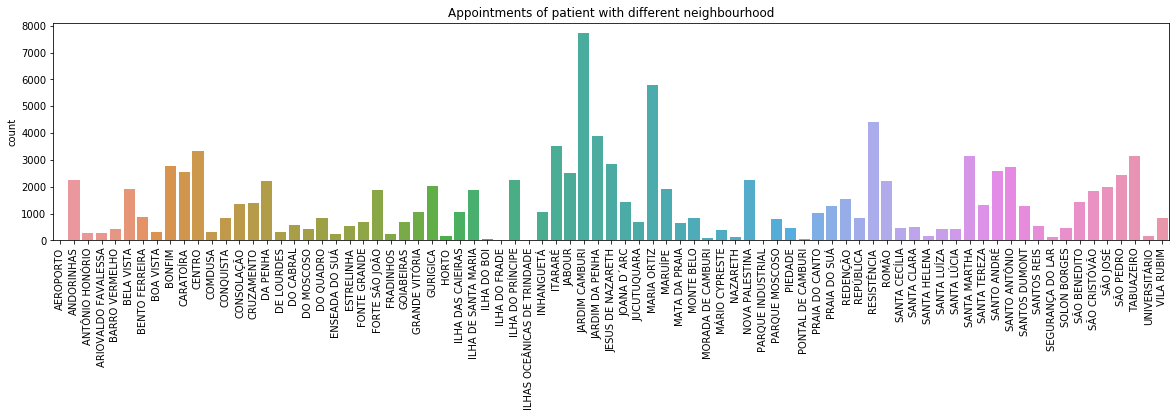

In [88]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.countplot(x=np.sort(df['neighbourhood']))
plt.title('Appointments of patient with different neighbourhood')
plt.show()

####  Among all neighbourhood some shows high number of doctor apointment 

In [89]:
df.groupby('neighbourhood').count()['patientid'].sort_values(ascending=False)[:20]

neighbourhood
JARDIM CAMBURI       7717
MARIA ORTIZ          5804
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
ILHA DO PRÍNCIPE     2266
NOVA PALESTINA       2264
ANDORINHAS           2258
DA PENHA             2217
ROMÃO                2214
Name: patientid, dtype: int64

From the above  data we have seen that some naighbour have high number of patient

In [94]:
mean_age_each_neighbourhood=df.groupby('neighbourhood').mean()['age']

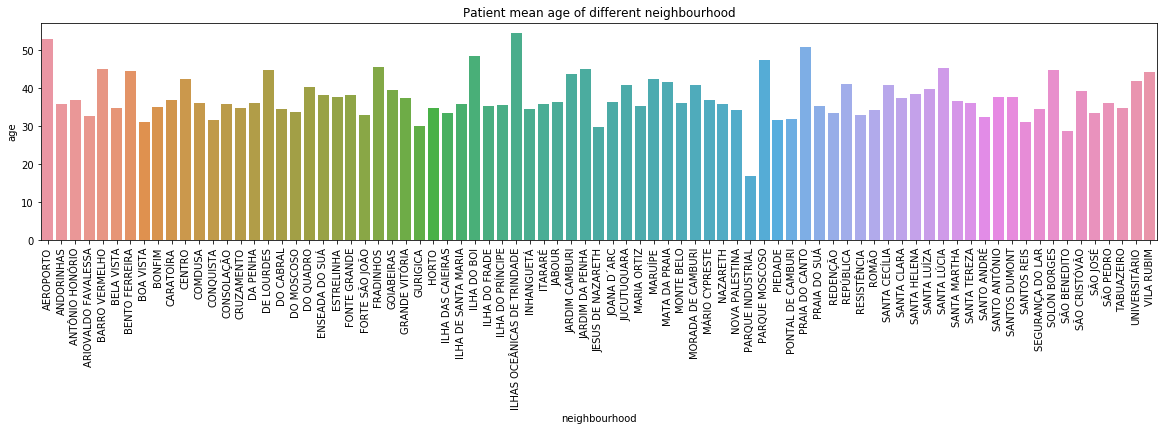

In [95]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=mean_age_each_neighbourhood.index , y=mean_age_each_neighbourhood)
plt.title('Patient mean age of different neighbourhood')
plt.show()

#### form the above plot we can find the Patient mean age of different neighbourhood

In [96]:
absent_by_neighbourhood=absent.groupby('neighbourhood').size()/df.groupby('neighbourhood').size()

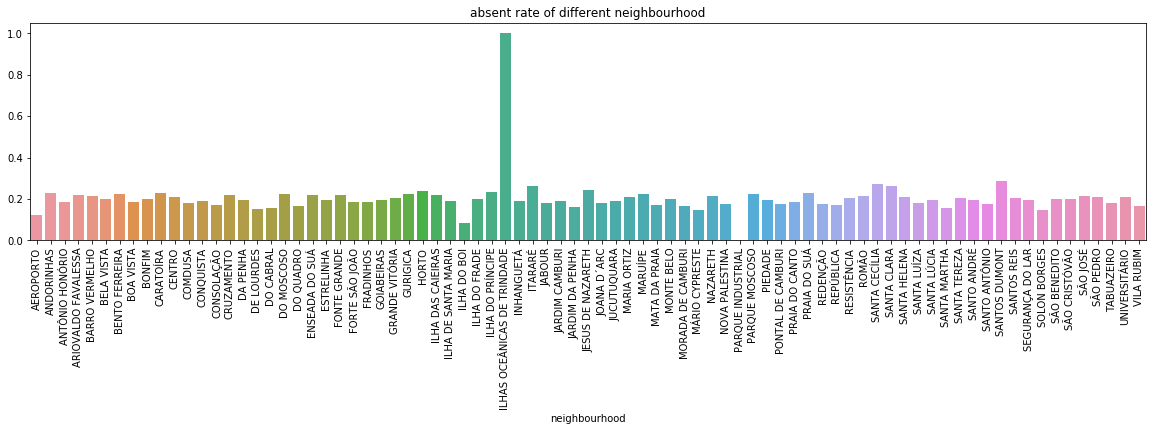

In [97]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=absent_by_neighbourhood.index , y=absent_by_neighbourhood)
plt.title('absent rate of different neighbourhood')
plt.show()

### Findings
about 20% of all neighbourhood absent of appointment; it does not give much sense in model creation


### What is the effect of  patient dependent variable   on Doctor Visit Appointment Show Up or No Show Up

In [98]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'doctor_visit',
       'scheduledday_of_week', 'appointmentday_of_week', 'waiting_Time',
       'age_bin'],
      dtype='object')

In [99]:
 def countplot(x):
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[x], hue=df['doctor_visit'], data=df)
    plt.xticks([0,1],['No {}'.format(x), '{}'.format(x)])
    plt.title('Doctor Visit for {} '. format(x))
    plt.show()

In [100]:
def pieplot(x):
    df.groupby(['doctor_visit',x]).size().plot(kind='pie', autopct='%1.1f%%',figsize=(8,6))
    plt.title('Doctor Visit % for {}'.format(x))
    plt.ylabel("")
    plt.show()

In [101]:
def absent_ration(x):
    ration=absent.groupby(x).size()/df.groupby(x).size()
    plt.figure(figsize=(8,4))
    sns.barplot(x=ration.index , y=ration)
    plt.xticks([0,1],['No {}'.format(x), '{}'.format(x)])
    plt.title('absent rate on {} '.format(x))
    plt.show()

In [102]:
def absent_ration_pie(x):
    ration=absent.groupby(x).size()/df.groupby(x).size()
    ration.plot(kind='pie',  autopct='%1.1f%%',figsize=(8,6))
    plt.title('absent rate on {} receive'.format(x))
    plt.ylabel('')
    plt.show()

## 'scholarship'

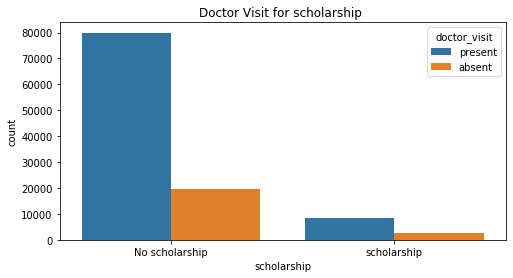

In [103]:
countplot('scholarship')

### doctor visit  number with scholoership and no scholership group 

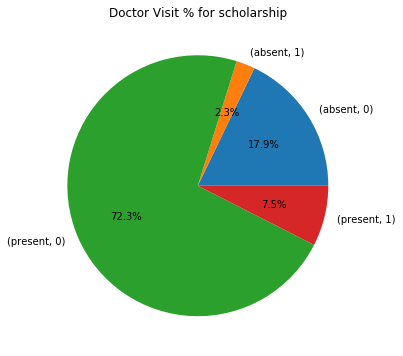

In [105]:
pieplot('scholarship')

### doctor visit parcent  with scholoership and no scholership group

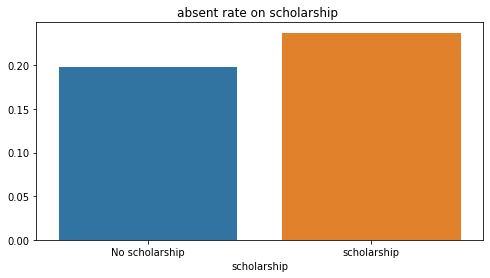

In [106]:
absent_ration('scholarship')

### doctor visit absent rate with scholoership and no scholership group

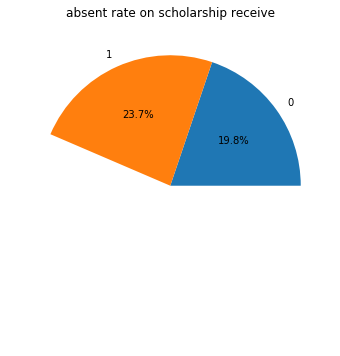

In [295]:
absent_ration_pie('scholarship')

### doctor visit absent parcent  with scholoership and no scholership group

### Findings
those who get scholership 23.7% shows absent in doctor visit and no scholership grop shows 19.8% apsent rate 

## 'hypertension'

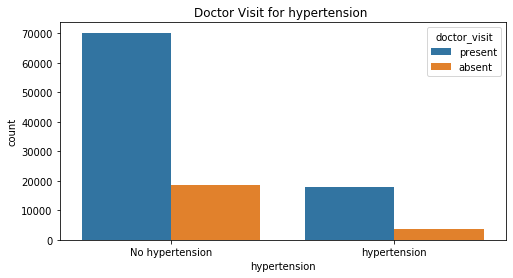

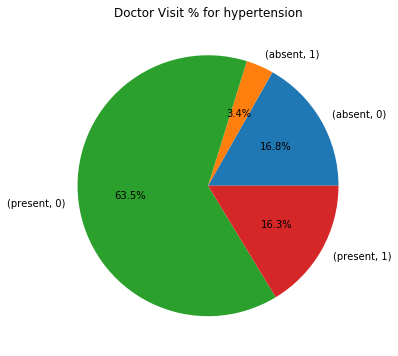

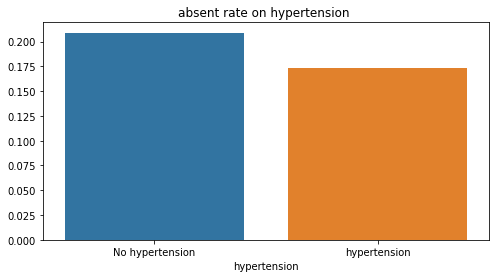

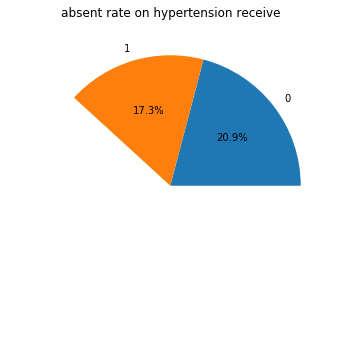

In [110]:
countplot('hypertension')
pieplot('hypertension')
absent_ration('hypertension')
absent_ration_pie('hypertension')

### doctor visit  number  and parcent with hypertension and no  hypertension group 

### Findings
those who have no hipertension 20.9 % shows absent in doctor visit and hipertensinp group shows 17.3% apsent rate 

## 'diabetes'

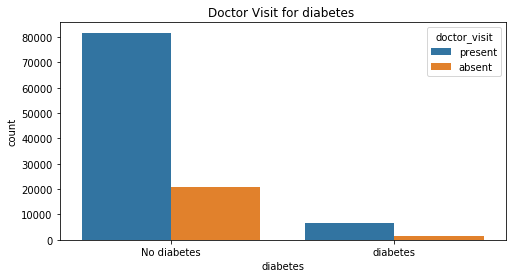

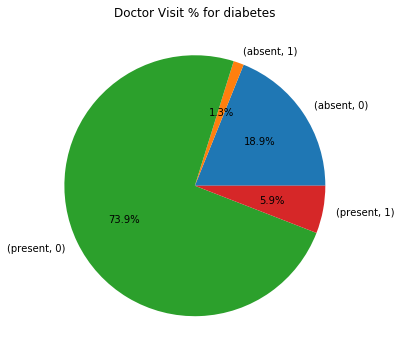

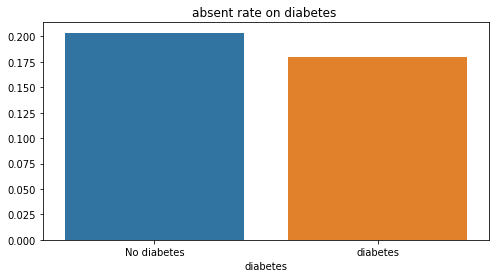

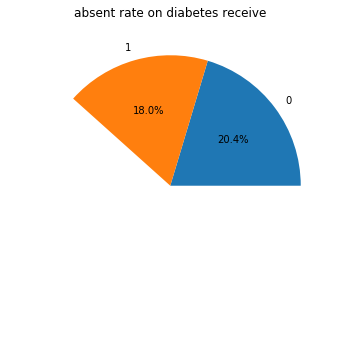

In [297]:
countplot('diabetes')
pieplot('diabetes')
absent_ration('diabetes')
absent_ration_pie('diabetes')

### doctor visit  number  and parcent with diabetes and no  diabetes group 

### Findings
those who have dibatics 18 % shows absent in doctor visit and no dibatics group shows 20.4% apsent rate 

## 'alcoholism'

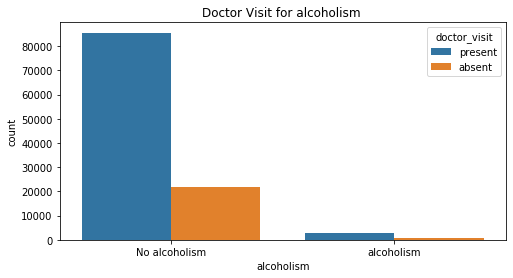

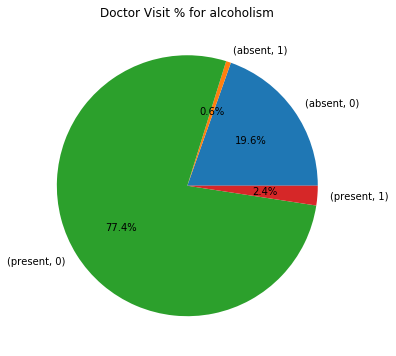

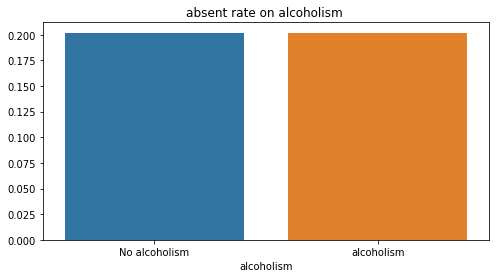

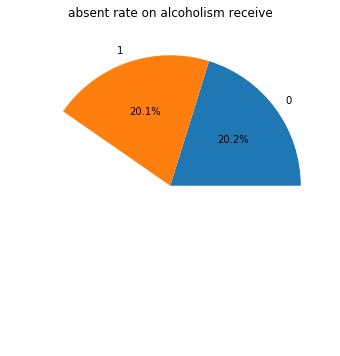

In [298]:
countplot('alcoholism')
pieplot('alcoholism')
absent_ration('alcoholism')
absent_ration_pie('alcoholism')

### doctor visit  number  and parcent with alcoholism and no  alcoholism group 

### Findings
There is no effect of alcoholism in doctor visit absence 

## 'sms_received'

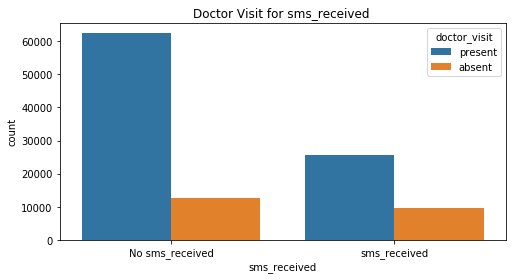

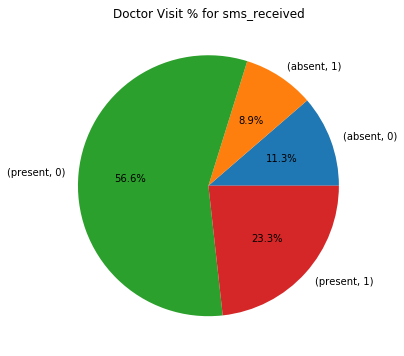

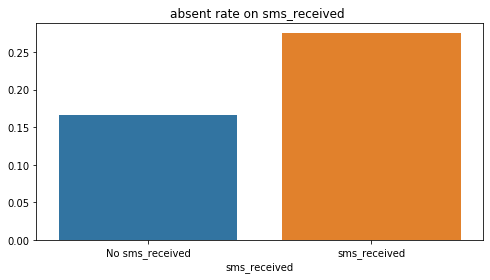

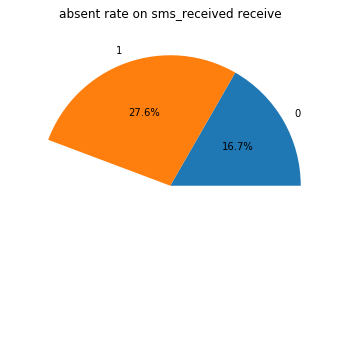

In [299]:
countplot('sms_received')
pieplot('sms_received')
absent_ration('sms_received')
absent_ration_pie('sms_received')

### doctor visit  number  and parcent with  sms_received and no   sms_received group 

### Findings
those who received SMS 27.6 % shows absent in doctor visit and no SMS received group shows 16.7% absent rate 

## 'handicap'

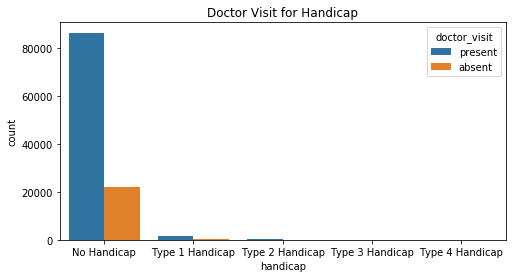

In [300]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['handicap'], hue=df['doctor_visit'], data=df)
plt.xticks([0,1,2,3,4],['No Handicap','Type 1 Handicap','Type 2 Handicap','Type 3 Handicap','Type 4 Handicap'])
plt.title('Doctor Visit for Handicap')
plt.show()

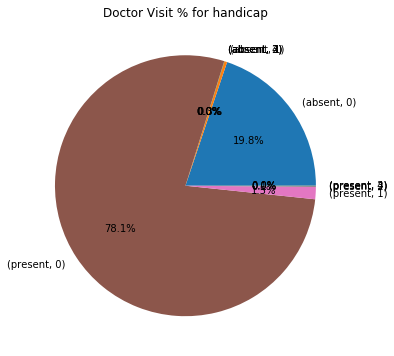

In [301]:
df.groupby(['doctor_visit',df['handicap']]).size().plot(kind='pie', autopct='%1.1f%%',figsize=(8,6))
plt.title('Doctor Visit % for handicap')
plt.ylabel("")
plt.show()

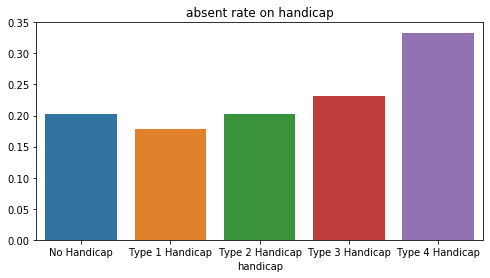

In [302]:
ration=absent.groupby(df['handicap']).size()/df.groupby(df['handicap']).size()
plt.figure(figsize=(8,4))
sns.barplot(x=ration.index , y=ration)
plt.xticks([0,1,2,3,4],['No Handicap','Type 1 Handicap','Type 2 Handicap','Type 3 Handicap','Type 4 Handicap'])
plt.title('absent rate on handicap')
plt.show()

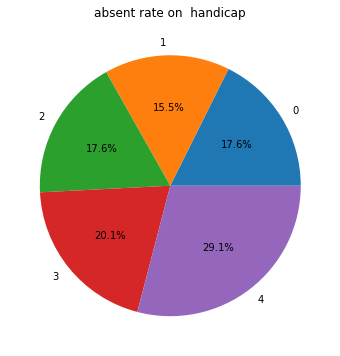

In [303]:
ration=absent.groupby(df['handicap']).size()/df.groupby(df['handicap']).size()
ration.plot(kind='pie',  autopct='%1.1f%%',figsize=(8,6))
plt.title('absent rate on  handicap')
plt.ylabel('')
plt.show()

### doctor visit  number  and parcent with  handicap and no  handicap group 

### Findings
those who have type 4 hadicape shows high absent rate 

## 'appointmentday_of_week'

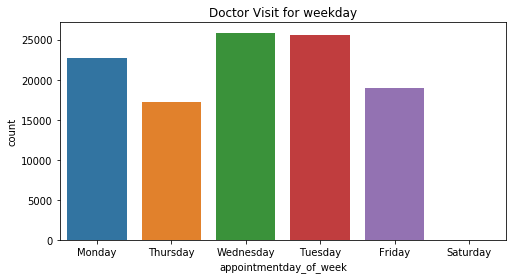

In [304]:
plt.figure(figsize=(8,4))
sns.countplot(x='appointmentday_of_week',order=['Monday','Thursday','Wednesday','Tuesday','Friday','Saturday'] ,data=df)
plt.title('Doctor Visit for weekday')
plt.show()

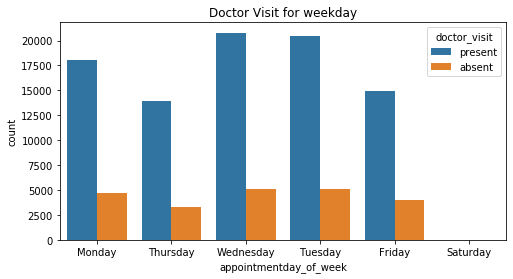

In [305]:
plt.figure(figsize=(8,4))
sns.countplot(x='appointmentday_of_week',hue='doctor_visit',order=['Monday','Thursday','Wednesday','Tuesday','Friday','Saturday'] ,data=df)
plt.title('Doctor Visit for weekday')
plt.show()

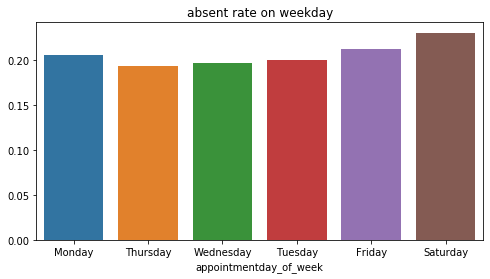

In [306]:
ration=absent.groupby(df['appointmentday_of_week']).size()/df.groupby(df['appointmentday_of_week']).size()
plt.figure(figsize=(8,4))
sns.barplot(x=ration.index , y=ration,order=['Monday','Thursday','Wednesday','Tuesday','Friday','Saturday'])
plt.title('absent rate on weekday')
plt.show()

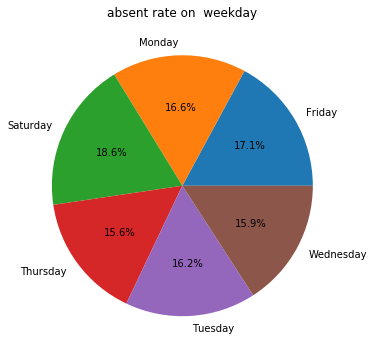

In [307]:
ration=absent.groupby(df['appointmentday_of_week']).size()/df.groupby(df['appointmentday_of_week']).size()
ration.plot(kind='pie',  autopct='%1.1f%%',figsize=(8,6))
plt.title('absent rate on  weekday')
plt.ylabel('')
plt.show()

### doctor visit  number  and parcent with  appointmentday_of_week  

### Findings
Absent rate is high on Saturday

## 'waiting_Time'

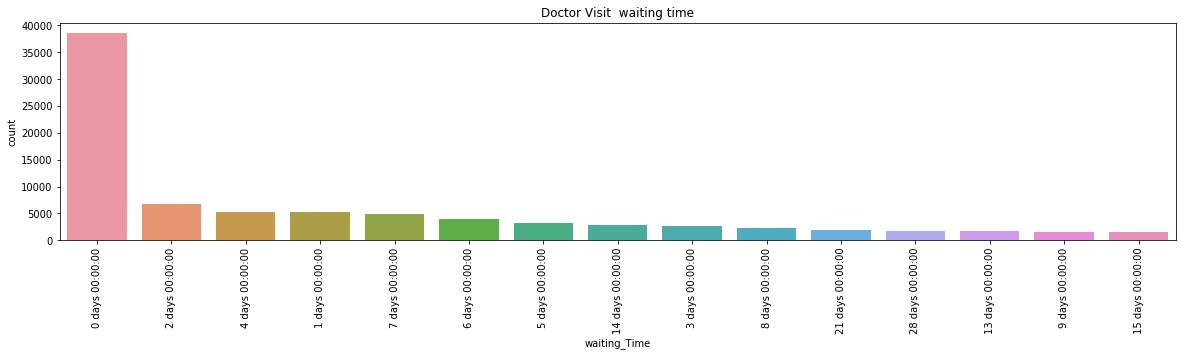

In [308]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.countplot(x='waiting_Time', order=df['waiting_Time'].value_counts().iloc[:15].index,data=df)
plt.title('Doctor Visit  waiting time')
plt.show()

### waiting_Time number  for 75 percentile patient  

In [309]:
df['waiting_Time'].describe()

count                     110519
mean     10 days 04:24:47.831051
std      15 days 06:07:26.624095
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: waiting_Time, dtype: object

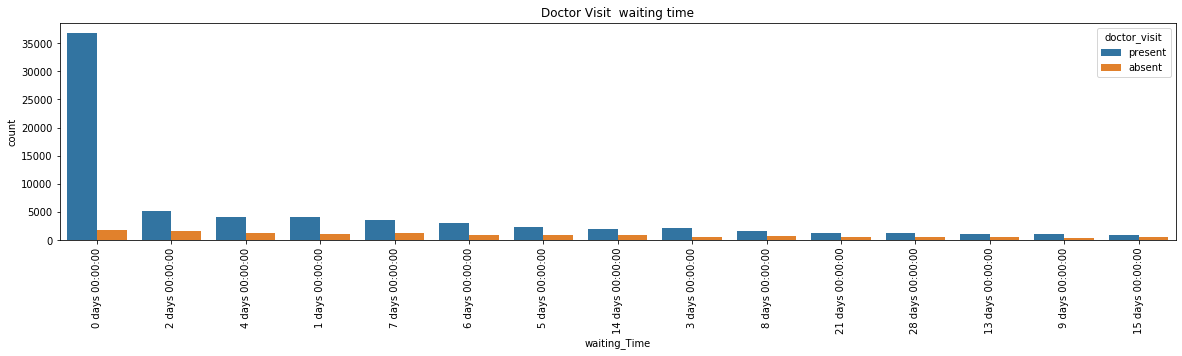

In [310]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.countplot(x='waiting_Time', hue='doctor_visit',order=df['waiting_Time'].value_counts().iloc[:15].index,data=df)
plt.title('Doctor Visit  waiting time')
plt.show()

### Findings
Most common waiting time is 0-4 days 

<a id='conclusions'></a>
## Conclusions
`age`

* From the figure we can see that at age 0 and 1 infent number of appointment is high then age 2 to 60  patient have almost same number of appointment and age above 60 year have right-skewed distribution of Number of Appointments.

* Doctor visit is high for age group 40 and up. 

* age with 4 to 44 and age above 90 have higher appoinment absent rate.

* Teenage, Young, Young Adult have high absent rate.

`corellation`

* From the correlation we can see that there is moderate positive coorealtion between age and hypertension , hypertension and diabetics 

`neighbourhood`

* From the above  data we have seen that some naighbour have high number of patient, about 20% of all neighbourhood absent of appointmen

`scholership`

* those who get scholership 23.7% shows absent in doctor visit and no scholership grop shows 19.8% apsent rate 

`hipertensinp`

* those who have no hipertension 20.9 % shows absent in doctor visit and hipertensinp group shows 17.3% apsent rate 

`dibatics`

* those who have dibatics 18 % shows absent in doctor visit and no dibatics group shows 20.4% apsent rate 


`alcoholism`

* There is no effect of alcoholism in doctor visit absence 


`hadicape`

* those who have type 4 hadicape shows high absent rate 


`SMS received`

* those who received SMS 27.6 % shows absent in doctor visit and no SMS received group shows 16.7% absent rate 


`weekday`

* Absent rate is high on Saturday


`waiting time`

* Most common waiting time is 0-4 days 

#### From the analysis  we could see that Gender, Age, Neighbourhood, Scholarship , Hypertension and Week of the day have effent on the patient who has taken an appointment will Show/NoShow.



## Limitation

We have the data where  AppointmentDay spans just over a month which might not represent the  whole data and the reasons for the appointment is absent that might be a good veriable that helps us to better pridict for the presence and absence of patients.

